# Problem Statement No. 08

### 1. Implement logistic regression using Python/R to perform classification on Social_Network_Ads.csv dataset.
### 2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset 

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [7]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
df.drop(['User ID'], axis = 1, inplace = True)

In [10]:
numerical_feat = [i for i in df.columns if df[i].dtypes != 'O'] 

In [11]:
numerical_feat

['Age', 'EstimatedSalary', 'Purchased']

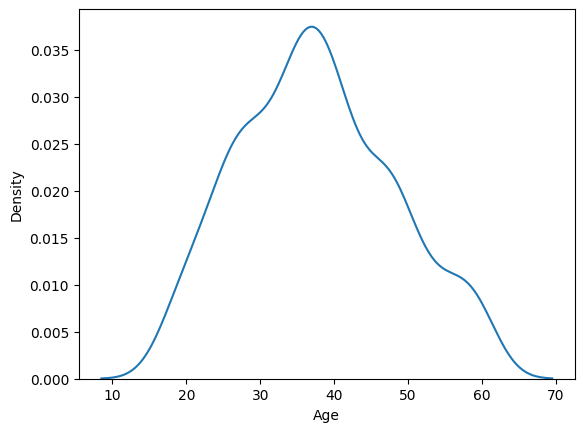

In [17]:
sns.kdeplot(df, x = 'Age')
plt.show()

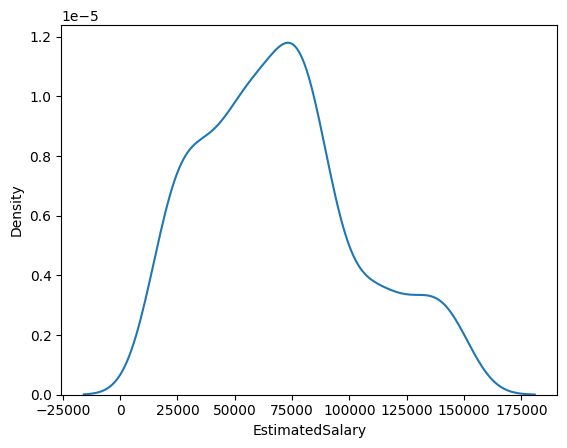

In [20]:
sns.kdeplot(df, x = 'EstimatedSalary')
plt.show()

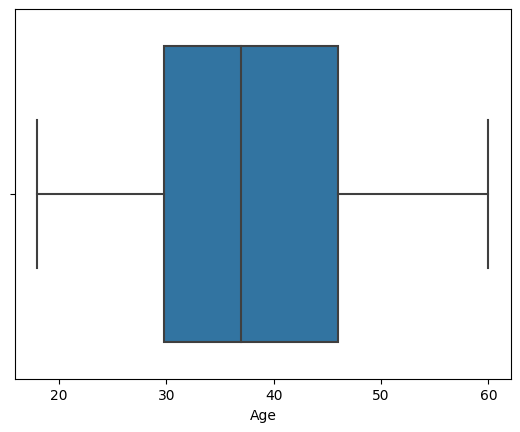

In [21]:
sns.boxplot(df, x = 'Age')
plt.show()

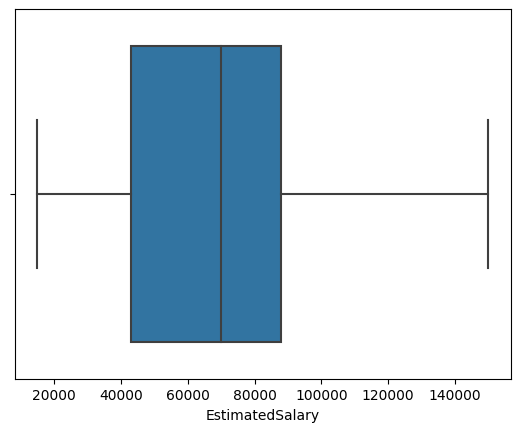

In [22]:
sns.boxplot(df, x = 'EstimatedSalary')
plt.show()

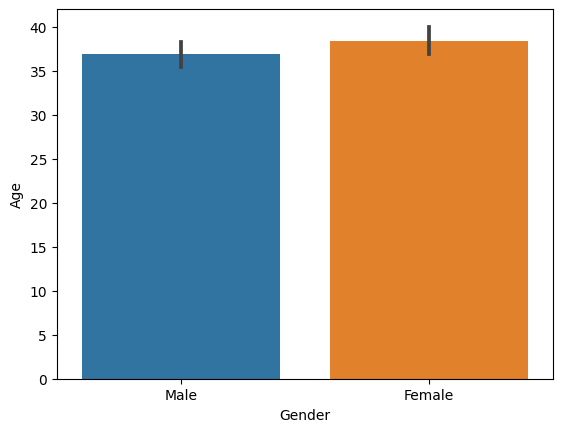

In [24]:
sns.barplot(df, x = 'Gender', y = 'Age')
plt.show()

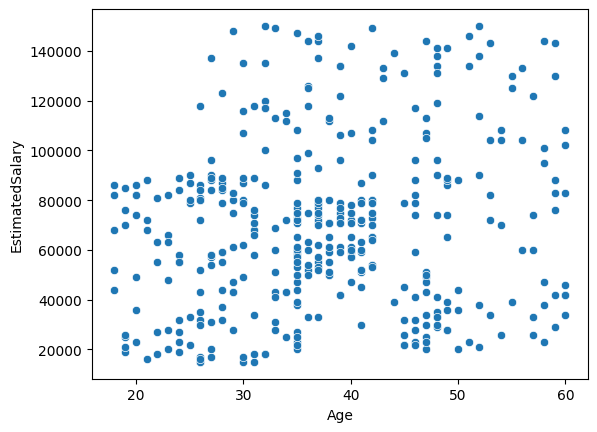

In [27]:
sns.scatterplot(df, x = 'Age', y = 'EstimatedSalary')
plt.show()

In [37]:
encoded_df = pd.get_dummies(df, columns = ['Gender'],dtype = int)

In [38]:
encoded_df = pd.DataFrame(encoded_df)

In [42]:
encoded_df.drop('Gender_Male', axis = 1, inplace = True)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X = encoded_df.drop(['Purchased'], axis = 1)
y = encoded_df['Purchased']

In [47]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [48]:
scale.fit(X)

MinMaxScaler()

In [49]:
scaled_x = scale.transform(X)

In [50]:
scaled_x

array([[0.02380952, 0.02962963, 0.        ],
       [0.4047619 , 0.03703704, 0.        ],
       [0.19047619, 0.20740741, 1.        ],
       ...,
       [0.76190476, 0.03703704, 1.        ],
       [0.42857143, 0.13333333, 0.        ],
       [0.73809524, 0.15555556, 1.        ]])

In [51]:
X_new = pd.DataFrame(scaled_x, columns = X.columns)

In [52]:
X_new

,Age,EstimatedSalary,Gender_Female
0,0.023810,0.029630,0.0
1,0.404762,0.037037,0.0
2,0.190476,0.207407,1.0
3,0.214286,0.311111,1.0
4,0.023810,0.451852,0.0
...,...,...,...
395,0.666667,0.192593,1.0
396,0.785714,0.059259,0.0
397,0.761905,0.037037,1.0
398,0.428571,0.133333,0.0


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y, test_size=0.25, random_state=0)

In [55]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [56]:
model.fit(X_train, y_train)

LogisticRegression()

In [57]:
y_pred = model.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix, classification_report

In [59]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [60]:
conf_matrix

array([[67,  1],
       [10, 22]], dtype=int64)

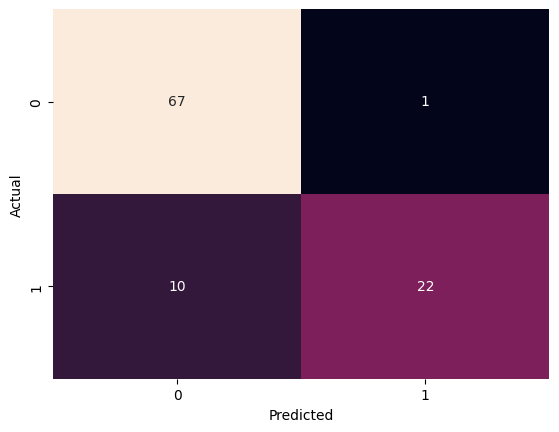

In [66]:
sns.heatmap(conf_matrix, annot = True , cbar = False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92        68
           1       0.96      0.69      0.80        32

    accuracy                           0.89       100
   macro avg       0.91      0.84      0.86       100
weighted avg       0.90      0.89      0.88       100

